In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

x_train, x_test = x_train.reshape(60000, 28, 28, 1), x_test.reshape(10000, 28, 28, 1)
x_train, x_test = x_train/255., x_test/255.

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [2]:
EPOCHS = 5

model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
    
# model fitting
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size = 32, validation_data=(x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1453 - acc: 0.9553 - val_loss: 0.0642 - val_acc: 0.9813
Epoch 2/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0448 - acc: 0.9864 - val_loss: 0.0539 - val_acc: 0.9829
Epoch 3/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0321 - acc: 0.9897 - val_loss: 0.0566 - val_acc: 0.9841
Epoch 4/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0224 - acc: 0.9927 - val_loss: 0.0488 - val_acc: 0.9875
Epoch 5/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0161 - acc: 0.9949 - val_loss: 0.0463 - val_acc: 0.9880


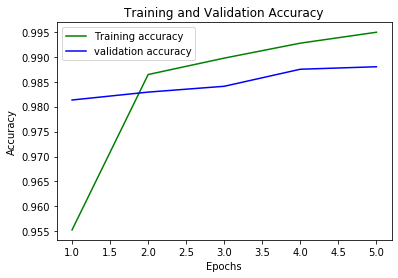

In [3]:
import matplotlib.pyplot as plt

loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

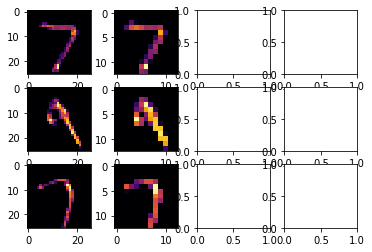

In [4]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,2):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)